In [ ]:
%matplotlib inline


# Curvilinear grid demo

Custom grid and ticklines.

This example demonstrates how to use
`~.grid_helper_curvelinear.GridHelperCurveLinear` to define custom grids and
ticklines by applying a transformation on the grid.  This can be used, as
shown on the second plot, to create polar projections in a rectangular box.


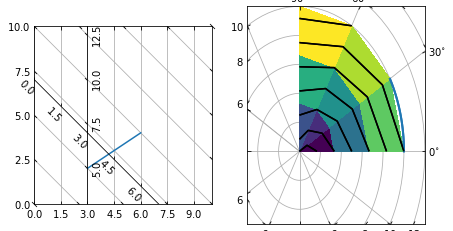

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D

from mpl_toolkits.axisartist import angle_helper, Axes, HostAxes
from mpl_toolkits.axisartist.grid_helper_curvelinear import (
    GridHelperCurveLinear)


def curvelinear_test1(fig):
    """
    Grid for custom transform.
    """

    def tr(x, y): return x, y - x
    def inv_tr(x, y): return x, y + x

    grid_helper = GridHelperCurveLinear((tr, inv_tr))

    ax1 = fig.add_subplot(1, 2, 1, axes_class=Axes, grid_helper=grid_helper)
    # ax1 will have ticks and gridlines defined by the given transform (+
    # transData of the Axes).  Note that the transform of the Axes itself
    # (i.e., transData) is not affected by the given transform.
    xx, yy = tr(np.array([3, 6]), np.array([5, 10]))
    ax1.plot(xx, yy)

    ax1.set_aspect(1)
    ax1.set_xlim(0, 10)
    ax1.set_ylim(0, 10)

    ax1.axis["t"] = ax1.new_floating_axis(0, 3)
    ax1.axis["t2"] = ax1.new_floating_axis(1, 7)
    ax1.grid(True, zorder=0)


def curvelinear_test2(fig):
    """
    Polar projection, but in a rectangular box.
    """

    # PolarAxes.PolarTransform takes radian. However, we want our coordinate
    # system in degree
    tr = Affine2D().scale(np.pi/180, 1) + PolarAxes.PolarTransform()
    # Polar projection, which involves cycle, and also has limits in
    # its coordinates, needs a special method to find the extremes
    # (min, max of the coordinate within the view).
    extreme_finder = angle_helper.ExtremeFinderCycle(
        nx=20, ny=20,  # Number of sampling points in each direction.
        lon_cycle=360, lat_cycle=None,
        lon_minmax=None, lat_minmax=(0, np.inf),
    )
    # Find grid values appropriate for the coordinate (degree, minute, second).
    grid_locator1 = angle_helper.LocatorDMS(12)
    # Use an appropriate formatter.  Note that the acceptable Locator and
    # Formatter classes are a bit different than that of Matplotlib, which
    # cannot directly be used here (this may be possible in the future).
    tick_formatter1 = angle_helper.FormatterDMS()

    grid_helper = GridHelperCurveLinear(
        tr, extreme_finder=extreme_finder,
        grid_locator1=grid_locator1, tick_formatter1=tick_formatter1)
    ax1 = fig.add_subplot(
        1, 2, 2, axes_class=HostAxes, grid_helper=grid_helper)

    # make ticklabels of right and top axis visible.
    ax1.axis["right"].major_ticklabels.set_visible(True)
    ax1.axis["top"].major_ticklabels.set_visible(True)
    # let right axis shows ticklabels for 1st coordinate (angle)
    ax1.axis["right"].get_helper().nth_coord_ticks = 0
    # let bottom axis shows ticklabels for 2nd coordinate (radius)
    ax1.axis["bottom"].get_helper().nth_coord_ticks = 1

    ax1.set_aspect(1)
    ax1.set_xlim(-5, 12)
    ax1.set_ylim(-5, 10)

    ax1.grid(True, zorder=0)

    # A parasite axes with given transform
    ax2 = ax1.get_aux_axes(tr)
    # note that ax2.transData == tr + ax1.transData
    # Anything you draw in ax2 will match the ticks and grids of ax1.
    ax1.parasites.append(ax2)
    ax2.plot(np.linspace(0, 30, 51), np.linspace(10, 10, 51), linewidth=2)

    ax2.pcolor(np.linspace(0, 90, 4), np.linspace(0, 10, 4),
               np.arange(9).reshape((3, 3)))
    ax2.contour(np.linspace(0, 90, 4), np.linspace(0, 10, 4),
                np.arange(16).reshape((4, 4)), colors="k")


if __name__ == "__main__":
    fig = plt.figure(figsize=(7, 4))

    curvelinear_test1(fig)
    curvelinear_test2(fig)

    plt.show()